<a href="https://colab.research.google.com/github/e-s-23/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#微積分とリアルタイムグラフ描画

詳細はgithubのREADME


まずはライブラリをインポート

In [ ]:
!pip install japanize_matplotlib

#以下2つのバージョンのプログラムを用意しています  
動作するものを使ってください  
同時に動かすのは危険なので注意して下さい

##Google Colab上で動作するver
Colab上で動作しますがGPUが弱いので時間がすごくかかります  
こればかりはどうしようもありません

式:3*x**2
微分/積分(b/s):b
微分結果:6*x
保存形式:gif/mp4/None(g/m/n)g


KeyboardInterrupt: 

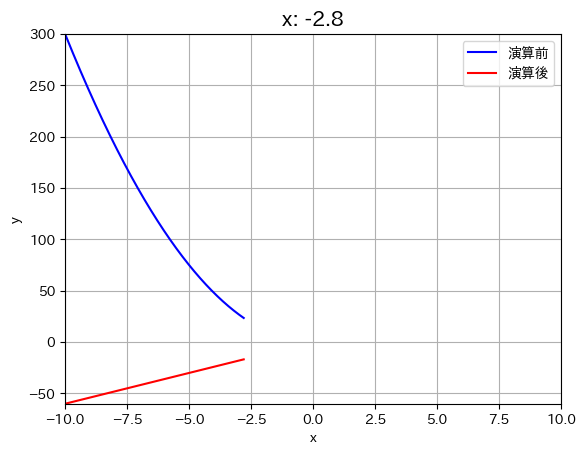

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from matplotlib import animation, rc
from IPython.display import HTML
import sympy as sy
from sympy import pi, E, I
import japanize_matplotlib

x = sy.Symbol("x")

def calugul(EQ):
    global m
    while True:
        mode = str(input("微分/積分(b/s):"))

        if(mode == "b"):
            ans = sy.diff(EQ,x)
            print(f'{"微分結果:"}{ans}')
            m = "微分"
            break

        elif(mode == "s"):
            ans = sy.integrate(EQ,x)
            print(f'{"積分結果:"}{ans}')
            m = "積分"
            break

        else:
            pass

    return ans

def generate_graph(data):
    x = np.linspace(-10,data/10,1000)
    y1 = c_nan(func1(x))
    y2 = c_nan(func2(x))

    line1.set_data(x,y1)
    line2.set_data(x,y2)
    title.set_text("x: {}".format((max(x))))

def c_nan(NP):
    df = pd.DataFrame(NP)
    df = df.fillna(0)
    c_NP = df.to_numpy()

    return c_NP

eq = input("式:")
args = (x)

ANS = calugul(eq)

func1 = sy.lambdify(args,eq,"numpy")
func2 = sy.lambdify(args,ANS,"numpy")
x = np.arange(-10,10,dtype = float)

y_max = max(max(c_nan(func1(x))),max(c_nan(func2(x))))
y_min = min(min(c_nan(func1(x))),min(c_nan(func2(x))))

fig,ax = plt.subplots()
line1, = ax.plot(np.empty(0),np.empty(0),color = "blue",label = "演算前")
line2, = ax.plot(np.empty(0),np.empty(0),color = "red",label = "演算後")
title = ax.set_title(None, fontsize=15)

ax.set_xlim(-10,10)
ax.set_ylim(y_min,y_max)
ax.grid()
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

ani = animation.FuncAnimation(
    fig,
    generate_graph,
    frames = range(-100,101),
    interval=20,
    repeat_delay = 1000)

eq_r = eq.replace('**','^').replace("*","×")

while True:
    var = str(input("保存形式:gif/mp4/None(g/m/n)"))

    if(var == "g"):
        ani.save(eq_r + "_" + m +".gif")
        break

    elif(var == "m"):
        ani.save(eq_r + "_" + m + ".mp4")
        break

    elif(var == "n"):
        break

#rc('animation', html='jshtml')
#ani

##pyファイル化してVScodeなどで動かすver
別の環境上ならある程度安定して動くように改造済みです  
こちらを個人的にはお勧めします

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import sympy as sy
from sympy import pi, E, I
import japanize_matplotlib

x = sy.Symbol("x")

def calugul(EQ):
    global m
    while True:
        mode = str(input("微分/積分(b/s):"))

        if(mode == "b"):
            ans = sy.diff(EQ,x)
            print(f'{"微分結果:"}{ans}')
            m = "微分"
            break

        elif(mode == "s"):
            ans = sy.integrate(EQ,x)
            print(f'{"積分結果:"}{ans}')
            m = "積分"
            break

        else:
            pass

    return ans

def generate_graph(data):
    x = np.linspace(-10,data/10,1000)
    y1 = c_nan(func1(x))
    y2 = c_nan(func2(x))

    line1.set_data(x,y1)
    line2.set_data(x,y2)
    title.set_text("x: {}".format((max(x))))

def c_nan(NP):
    df = pd.DataFrame(NP)
    df = df.fillna(0)
    c_NP = df.to_numpy()

    return c_NP

eq = input("式:")
args = (x)

ANS = calugul(eq)

func1 = sy.lambdify(args,eq,"numpy")
func2 = sy.lambdify(args,ANS,"numpy")
x = np.arange(-10,10,dtype = float)

y_max = max(max(c_nan(func1(x))),max(c_nan(func2(x))))
y_min = min(min(c_nan(func1(x))),min(c_nan(func2(x))))

fig,ax = plt.subplots()
line1, = ax.plot(np.empty(0),np.empty(0),color = "blue",label = "演算前")
line2, = ax.plot(np.empty(0),np.empty(0),color = "red",label = "演算後")
title = ax.set_title(None, fontsize=15)

ax.set_xlim(-10,10)
ax.set_ylim(y_min,y_max)
ax.grid()
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")

ani = FuncAnimation(
    fig,
    generate_graph,
    frames = range(-100,101),
    interval=20,
    repeat_delay = 1000)

plt.show()

eq_r = eq.replace('**','^').replace("*","×")

while True:
    var = str(input("保存形式:gif/mp4/None(g/m/n)"))

    if(var == "g"):
        ani.save(eq_r + "_" + m +".gif", writer = 'pillow',fps = 30)
        break

    elif(var == "m"):
        ani.save(eq_r + "_" + m + ".mp4", writer="ffmpeg", fps = 30, bitrate=1000)
        break

    elif(var == "n"):
        break